# Exploring Ebay Car Sales Dataset



## 1. Introduction

#### In this guided project, I work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

 - The dataset was originally scraped and uploaded to Kaggle.
    
    - I sampled 50,000 data points from the full dataset, to ensure your code runs quickly in my hosted environment
    - I dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)

- The data dictionary provided with data is as follows:

    - dateCrawled - When this ad was first crawled. All field-values are taken from this date.
    - name - Name of the car.
    - seller - Whether the seller is private or a dealer.
    - offerType - The type of listing
    - price - The price on the ad to sell the car.
    - abtest - Whether the listing is included in an A/B test.
    - vehicleType - The vehicle Type.
    - yearOfRegistration - The year in which the car was first registered.
    - gearbox - The transmission type.
    - powerPS - The power of the car in PS.
    - model - The car model name.
    - kilometer - How many kilometers the car has driven.
    - monthOfRegistration - The month in which the car was first registered.
    - fuelType - What type of fuel the car uses.
    - brand - The brand of the car.
    - notRepairedDamage - If the car has a damage which is not yet repaired.
    - dateCreated - The date on which the eBay listing was created.
    - nrOfPictures - The number of pictures in the ad.
    - postalCode - The postal code for the location of the vehicle.
    - lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

Start by importing the libraries we need and reading the dataset into pandas.

In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
autos = pd.read_csv("autos.csv", encoding = 'latin-1')

In [6]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [7]:
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [8]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj



Brief observation:

- The dataset consists of 20 columns
- 15 columns contain data of object type, 5 columns are int.64 type. Changing of data type might be required for some object columns, e.g. price.
- 5 columns contain missing values, but none of them contain more than 20% missing values
- camelcase i n column names is needed to be changed to snakecase



## 2. Cleaning Column Names

In [10]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
autos.rename(columns = {'yearOfRegistration' : 'registration_year', 'monthOfRegistration' : 'registration_month', 'notRepairedDamage' : 'unrepaired_damage', 'dateCreated' : 'ad_created'}, inplace = True)

In [12]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuelType', 'brand',
       'unrepaired_damage', 'ad_created', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [13]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [15]:
autos.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 15:49:30,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN




Findings:

- Columns with mostly one values are: seller, offer_type, num_photos. These columns are candidates to be dropped, because no useful information can be extracted.
- Numeric data stored as text: price, odometer.
- Column ad_created needs further investigation, so far it seems that it consists of just one value

Let's drop three columns: seller, offer_type, num_photos


In [24]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 
                 'ab_test','vehicle_type', 'registration_year', 'gearbox', 
                 'power_ps', 'model','odometer', 'registration_month', 
                 'fuel_type', 'brand','unrepaired_damage', 'ad_created', 
                 'num_photos', 'postal_code','last_seen']

In [25]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')

In [26]:
autos = autos.drop(columns = ['seller','offer_type','num_photos'])

In [27]:
autos.columns

Index(['date_crawled', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

Next, I am going to convert the data in these two columns to numeric type and rename column odometer

In [29]:
autos['price'] = (autos['price'].str.replace(',','').str.replace('$','')).astype('float')

autos['odometer'] = (autos['odometer'].str.replace(',','').str.replace('km','')).astype('float')

autos.rename(columns={'odometer':'odometer_km'},inplace= True)

In [30]:
autos.columns

Index(['date_crawled', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

In [31]:
autos[['price','odometer_km']]

,price,odometer_km
0,5000.0,150000.0
1,8500.0,150000.0
2,8990.0,70000.0
3,4350.0,70000.0
4,1350.0,150000.0
5,7900.0,150000.0
6,300.0,150000.0
7,1990.0,150000.0
8,250.0,150000.0
9,590.0,150000.0


## 3. Exploring the Odometer and Price Columns

In [41]:
print(autos['price'].unique().shape)
print(autos['price'].describe())
print(autos['price'].value_counts().head(20))

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
1000.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
999.0      434
750.0      433
900.0      420
650.0      419
850.0      410
700.0      395
4500.0     394
300.0      384
2200.0     382
950.0      379
Name: price, dtype: int64




Findings:

- There are 2357 unique values in column price.
- Around 3% of prices equal 0, these rows might be considered for removing from the dataset.
- The minimum price is 0 and maximum price is one hundred million dollars, they look too small and too large respectively.

Let's explore the lowest and the highest prices further on.


In [44]:
autos['price'].value_counts().sort_index(ascending = False).head(20)

350000.0    1
345000.0    1
299000.0    1
295000.0    1
265000.0    1
259000.0    1
250000.0    1
220000.0    1
198000.0    1
197000.0    1
194000.0    1
190000.0    1
180000.0    1
175000.0    1
169999.0    1
169000.0    1
163991.0    1
163500.0    1
155000.0    1
151990.0    1
Name: price, dtype: int64

In [45]:
autos['price'].value_counts().sort_index(ascending = True).head(20)

1.0     156
2.0       3
3.0       1
5.0       2
8.0       1
9.0       1
10.0      7
11.0      2
12.0      3
13.0      2
14.0      1
15.0      2
17.0      3
18.0      1
20.0      4
25.0      5
29.0      1
30.0      7
35.0      1
40.0      6
Name: price, dtype: int64



Findings:

- A number of prices are below 30 dollars, the most frequent of them is 0 (1421 rows).
- Around 15 prices are higher than one million which seems too much.
- Starting from 350000 dollars, prices become twice higher.

Considering the fact that prices on Ebay could start at 1$ because it is an auction site, I will keep prices from 1 dollar to 350000 dollars in the dataset and remove the rest.


In [43]:
autos = autos[autos['price'].between(1,350000)]
autos['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

Next, let's explore the column `odometer_km'

In [48]:
autos['odometer_km'].value_counts().sort_index(ascending = False)

150000.0    31414
125000.0     5057
100000.0     2115
90000.0      1734
80000.0      1415
70000.0      1217
60000.0      1155
50000.0      1012
40000.0       815
30000.0       780
20000.0       762
10000.0       253
5000.0        836
Name: odometer_km, dtype: int64

## 4. Exploring Price by Brand

In [62]:
brand = autos['brand'].value_counts(normalize = True).sort_values(ascending = False).head(6)
brand

volkswagen       0.212828
opel             0.108658
bmw              0.108597
mercedes_benz    0.095789
audi             0.085823
ford             0.069639
Name: brand, dtype: float64

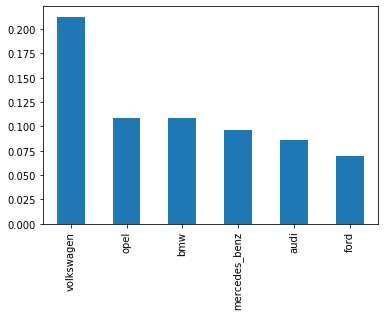

In [64]:
brand.plot(kind = 'bar')



German brands represent four out of five top brands, in total it is almost 50% of our dataset. The most popular brand is Volkswagen, the next two brands are twice less presented.

Some brands don't have a significant percentage so they may be excluded from dataset and only those brands with percentage of 5 percent or higher will be left for further analysis.


In [65]:
brand_counts = autos['brand'].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [66]:
brand_mean_prices = {}

for b in common_brands:
    b_only = autos[autos['brand'] == b]
    mean_price = b_only['price'].mean()
    brand_mean_prices[b] = int(mean_price)

brand_mean_prices

{'volkswagen': 5332,
 'opel': 2944,
 'bmw': 8261,
 'mercedes_benz': 8536,
 'audi': 9212,
 'ford': 3728}



Findings:

- The most expensive brand is audi
- The least expensive is opel
- volkswagen has the average price comparing to others, and if considering the fact that it has the greatest value of posted ads,



In [68]:
brand_mean_mileage = {}
for b in common_brands:
    b_only = autos[autos['brand'] == b]
    mean_mil = b_only['odometer_km'].mean()
    brand_mean_mileage[b] = int(mean_mil)
    

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_price = pd.Series(brand_mean_prices).sort_values(ascending=False)

In [69]:
brand_agg = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_agg['mean_price'] = mean_price

In [70]:
brand_agg

,mean_mileage,mean_price
bmw,132682,8261
mercedes_benz,130796,8536
audi,129492,9212
opel,129383,2944
volkswagen,128896,5332
ford,124349,3728




### Conclusion:

   **The more expensive the car, the greater value of mileage it has (with the exception of opel)**

